In [1]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth enabled")
    except RuntimeError as e:
        print(f"Memory growth error: {e}")

Memory growth enabled


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,InputLayer,AveragePooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization,Dropout,Activation
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16, InceptionV3, ResNet50,MobileNetV2, VGG19, EfficientNetB7, EfficientNetB0
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score, recall_score
from keras.mixed_precision import set_global_policy
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.applications.mobilenet_v2 import preprocess_input
import pickle

In [7]:
img = plt.imread("D:/Github/Datasets/Major Project Dataset/train/chai/005.jpg")
dims = np.shape(img)
matrix = np.reshape(img, (dims[0] * dims[1], dims[2]))
print(np.shape(matrix))

(328704, 3)


Image shape ->  (428, 768)
Color channels ->  3
Min color depth : 0, Max color depth 255


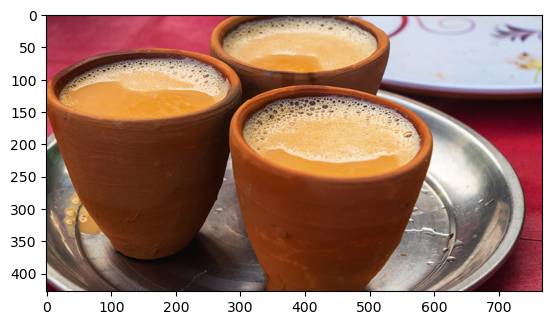

In [8]:
plt.imshow(img)
print("Image shape -> ",dims[:2])
print("Color channels -> ",dims[2])
print("Min color depth : {}, Max color depth {}".format(np.min(img),np.max(img)))

In [9]:
train_path = "D:/Github/Datasets/Major Project Dataset/train"
count = 0

for label in os.listdir(train_path):
    img_dir_path = os.path.join(train_path,label)
    print(label, len(os.listdir(img_dir_path)))
    count += 1

print("No of Classes:",count)

apple 259
apricot 259
baklava 252
biryani 210
black_berry 259
burger 233
butter_naan 217
chai 247
chapati 230
chicken_wings 252
chocolate_cake 259
chole_bhature 261
cranberry 259
crispy_chicken 252
custard_apple 252
dal_makhani 203
dhokla 167
donuts 259
french_fries 259
fried_rice 250
garlic_bread 259
grape 259
guava 252
gulab_jamun 175
idli 207
jalebi 194
kaathi_rolls 191
kadai_paneer 228
kulfi 134
mango 259
masala_dosa 187
momos 225
omelette 259
orange 259
paani_puri 85
pakode 179
papaya 259
pav_bhaji 210
peach 259
pineapple 252
pizza 184
samosa 164
sandwich 259
tomatoes 252
vada_pav 259
waffles 259
No of Classes: 46


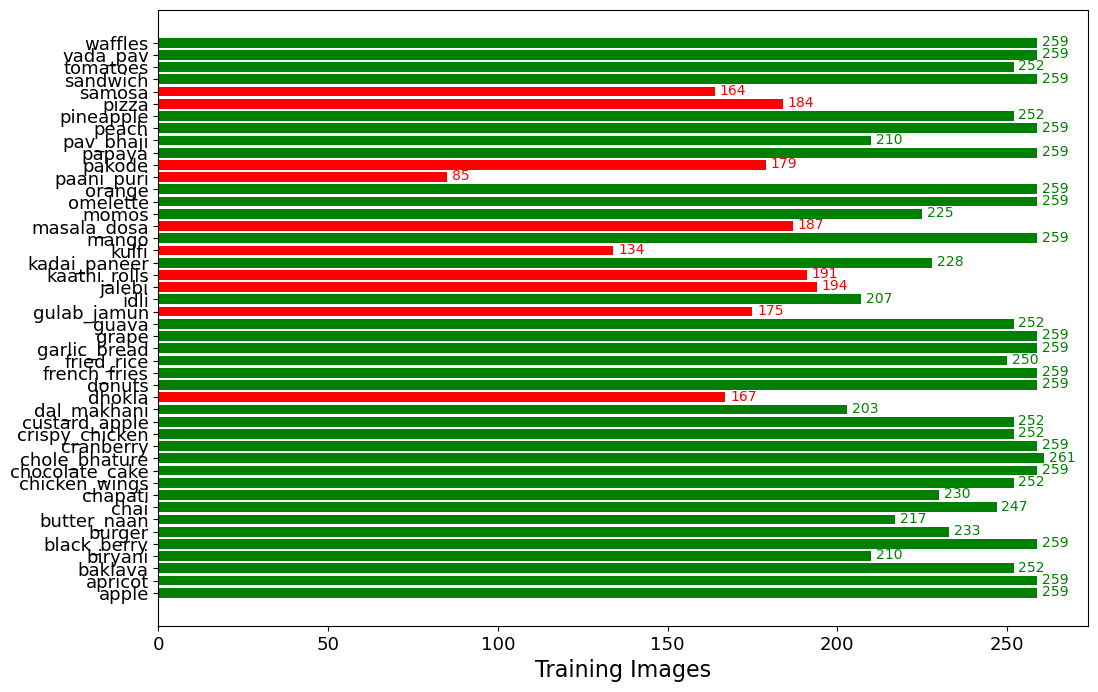

In [10]:
data=dict()

for i in os.listdir(train_path):
    sub_dir=os.path.join(train_path,i)
    count=len(os.listdir(sub_dir))
    data[i]=count
    
  
keys = data.keys()
values = data.values()

colors=["red" if x<= 200 else "green" for x in values]

fig, ax = plt.subplots(figsize=(12,8))
y_pos=np.arange(len(values))
plt.barh(y_pos,values,align='center',color=colors)
for i, v in enumerate(values):
    ax.text(v+1.4, i-0.25, str(v), color=colors[i])
ax.set_yticks(y_pos)
ax.set_yticklabels(keys)
ax.set_xlabel('Training Images',fontsize=16)
plt.xticks(color='black',fontsize=13)
plt.yticks(fontsize=13)
plt.show()

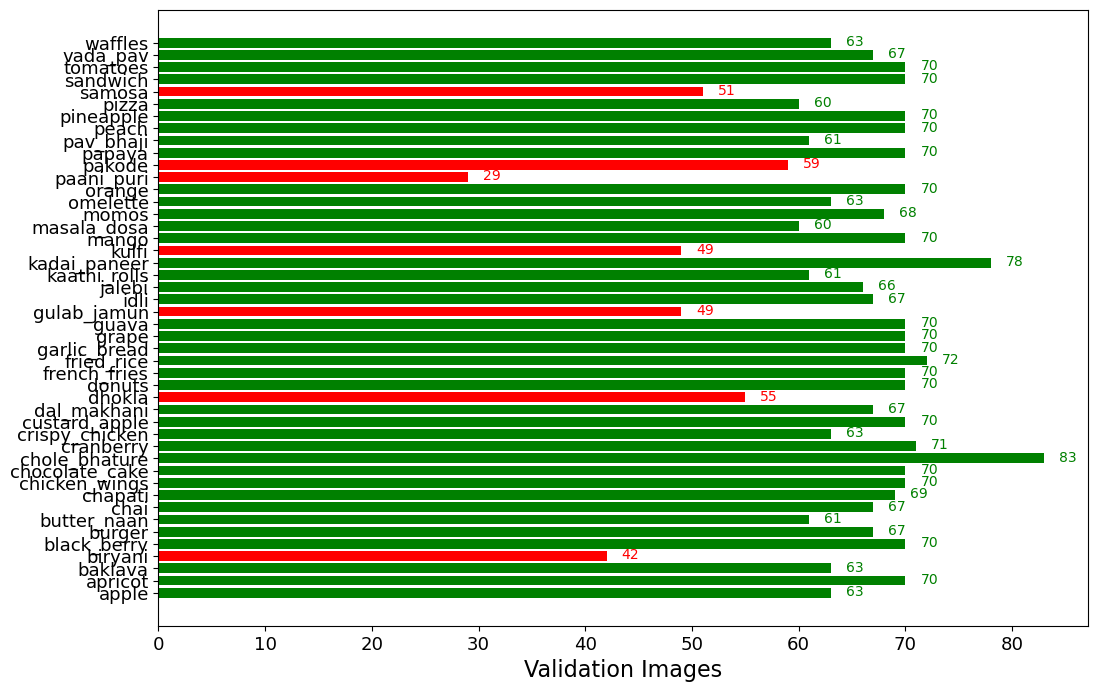

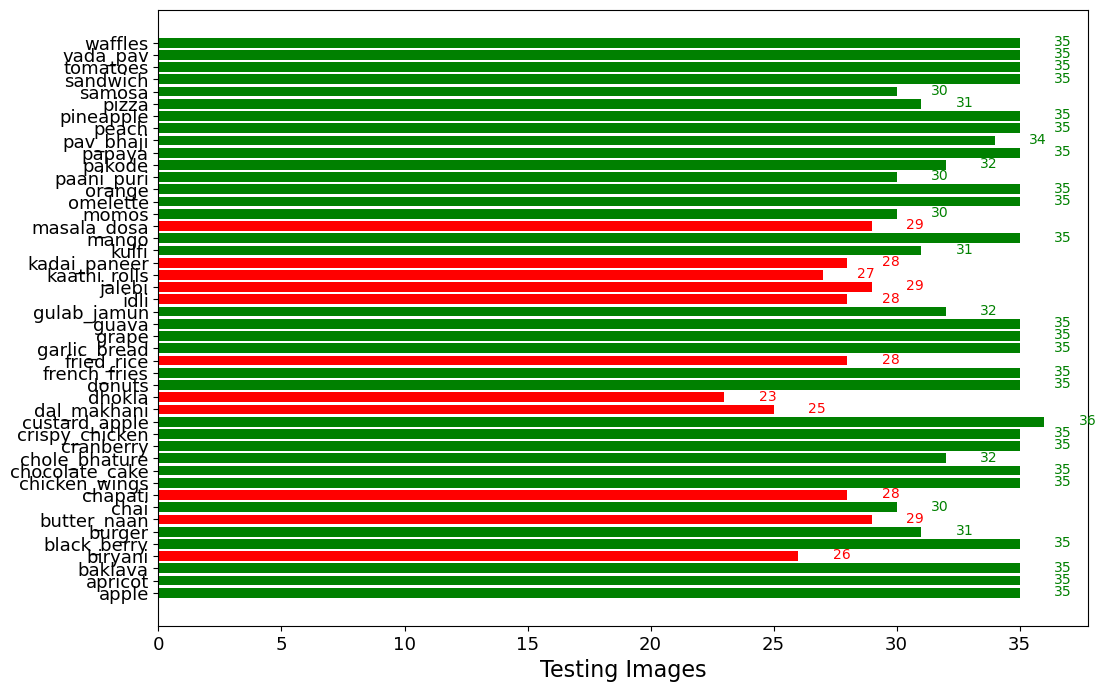

In [11]:
validation_path = "D:/Github/Datasets/Major Project Dataset/val"
test_path = "D:/Github/Datasets/Major Project Dataset/test"

val_data=dict()

for i in os.listdir(validation_path):
    sub_dir=os.path.join(validation_path,i)
    count=len(os.listdir(sub_dir))
    val_data[i]=count
    
  
keys = val_data.keys()
values = val_data.values()

colors=["red" if x< 60 else "green" for x in values]

fig, ax = plt.subplots(figsize=(12,8))
y_pos=np.arange(len(values))
plt.barh(y_pos,values,align='center',color=colors)
for i, v in enumerate(values):
    ax.text(v+1.4, i-0.25, str(v), color=colors[i])
ax.set_yticks(y_pos)
ax.set_yticklabels(keys)
ax.set_xlabel('Validation Images',fontsize=16)
plt.xticks(color='black',fontsize=13)
plt.yticks(fontsize=13)
plt.show()

# ===============================================================

test_data=dict()

for i in os.listdir(test_path):
    sub_dir=os.path.join(test_path,i)
    count=len(os.listdir(sub_dir))
    test_data[i]=count
    
  
keys = test_data.keys()
values = test_data.values()

colors=["red" if x< 30 else "green" for x in values]

fig, ax = plt.subplots(figsize=(12,8))
y_pos=np.arange(len(values))
plt.barh(y_pos,values,align='center',color=colors)
for i, v in enumerate(values):
    ax.text(v+1.4, i-0.25, str(v), color=colors[i])
ax.set_yticks(y_pos)
ax.set_yticklabels(keys)
ax.set_xlabel('Testing Images',fontsize=16)
plt.xticks(color='black',fontsize=13)
plt.yticks(fontsize=13)
plt.show()

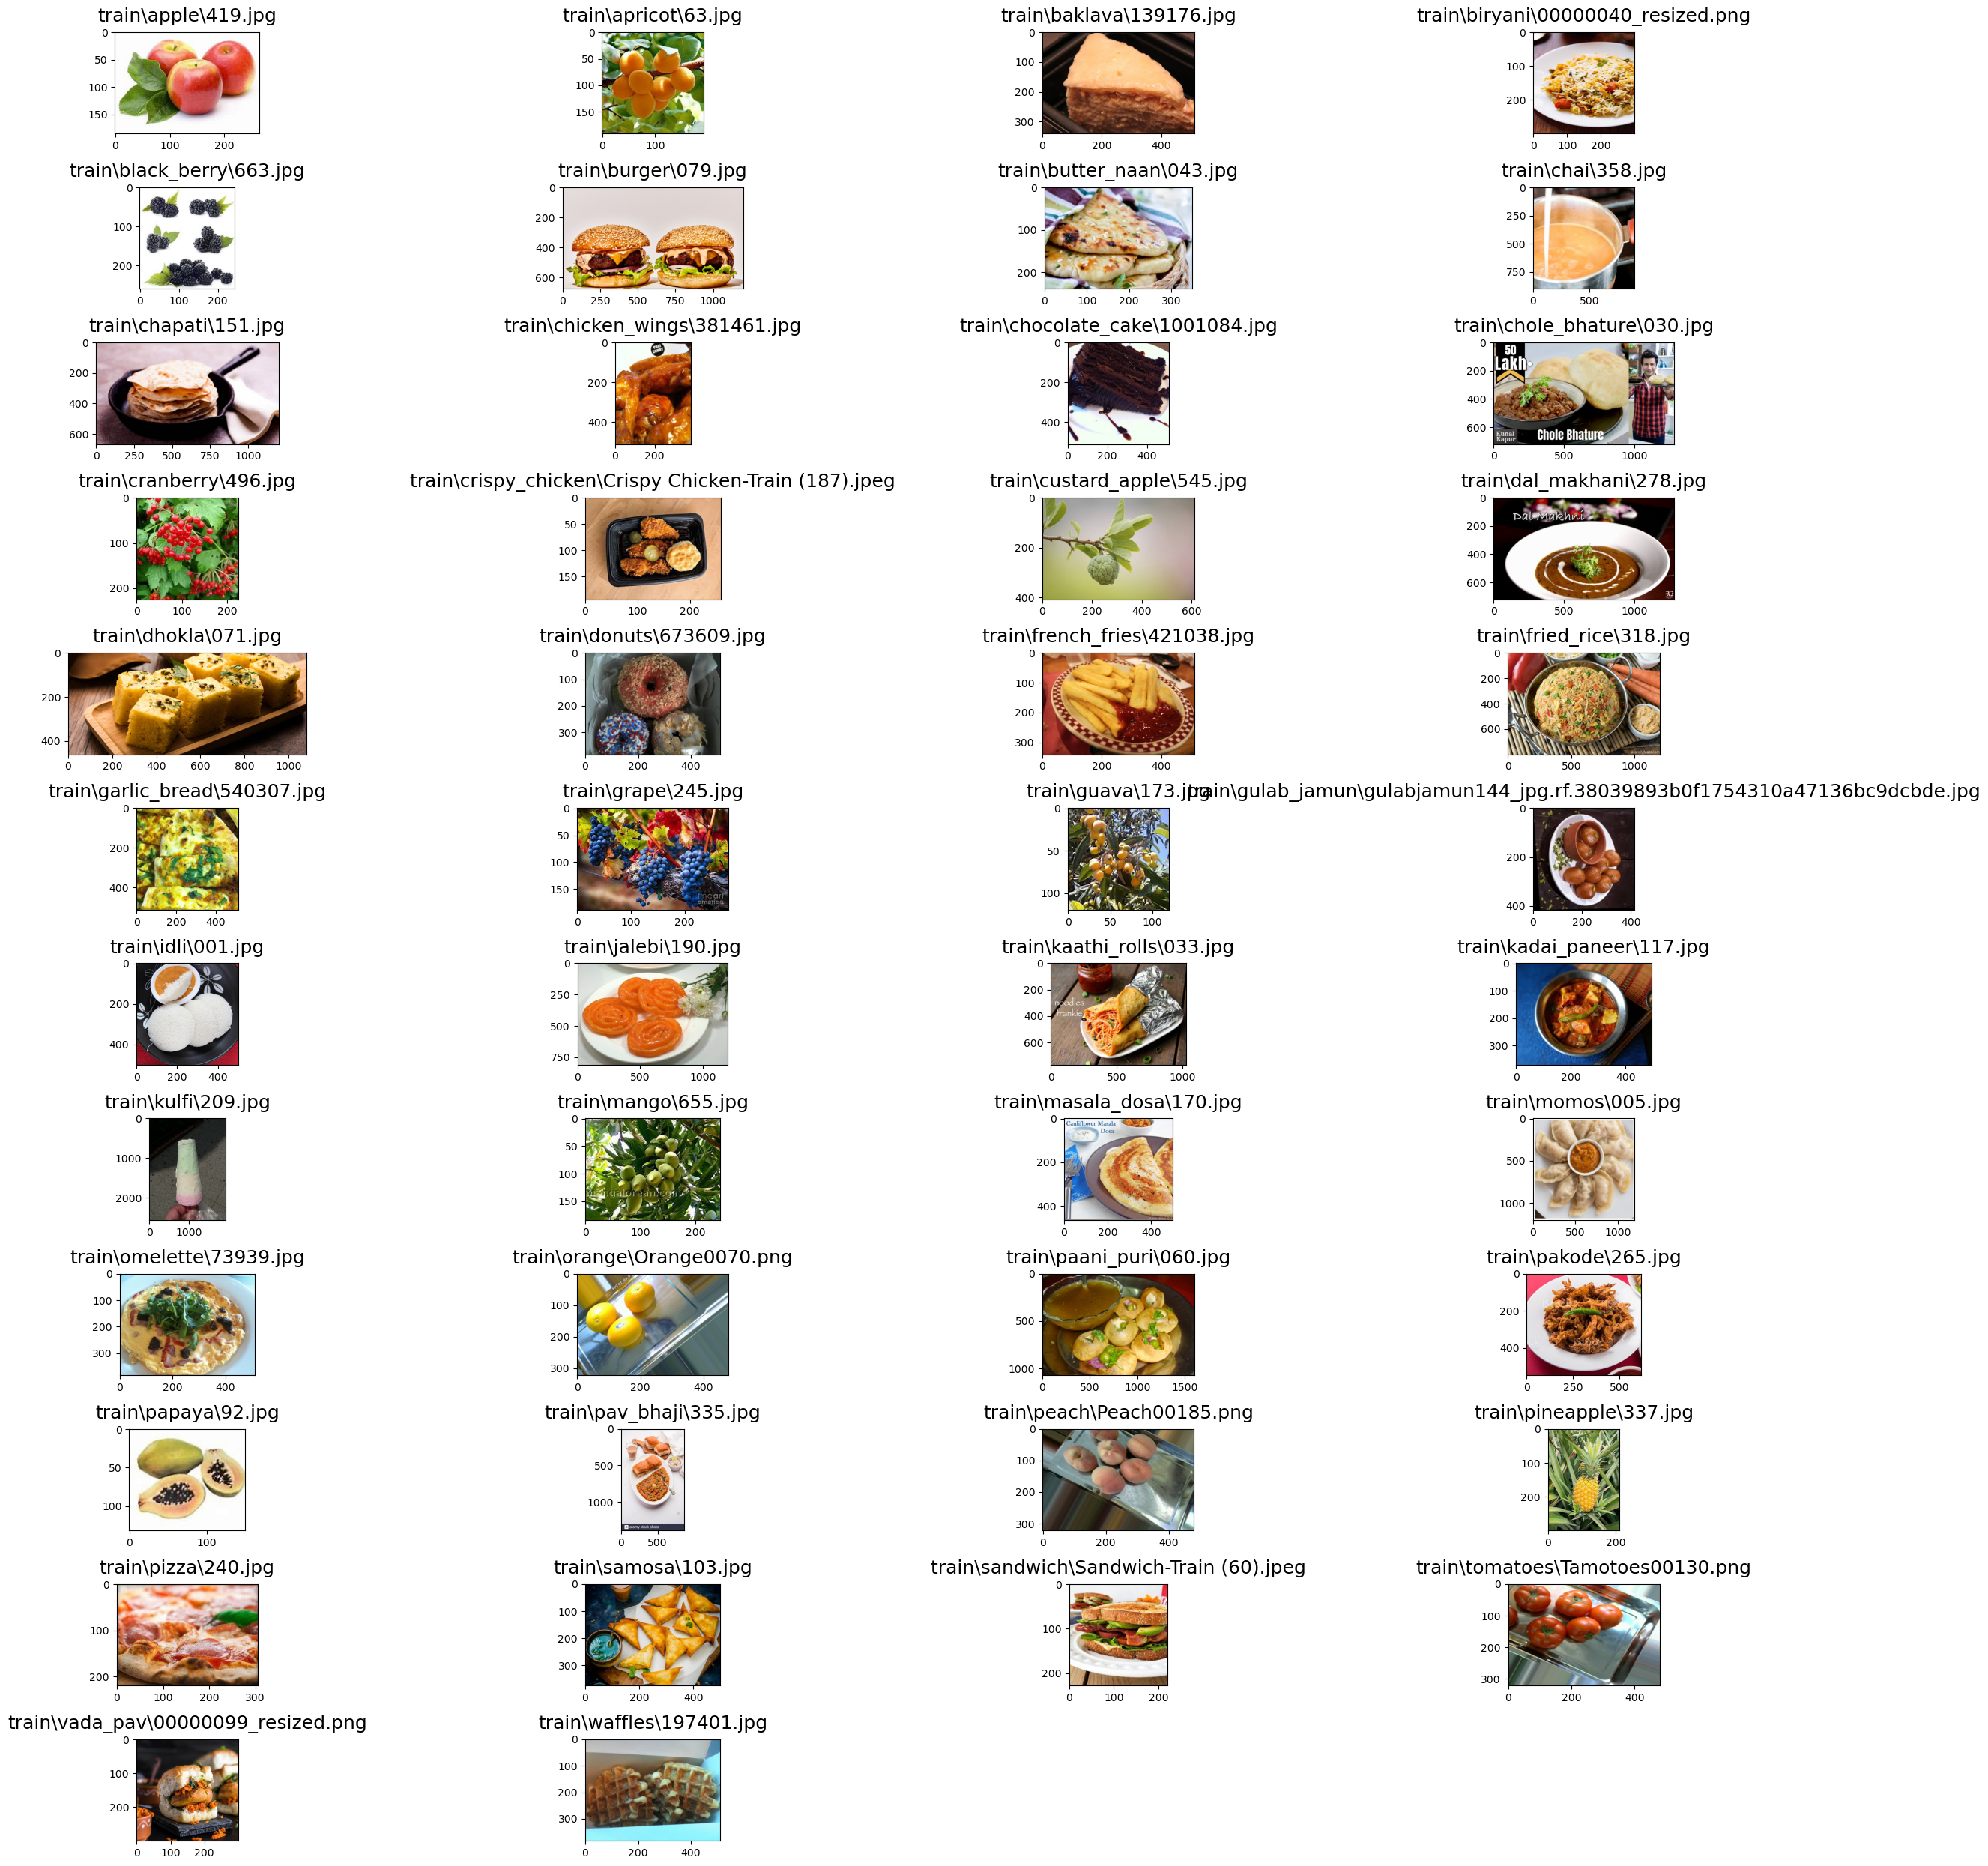

In [12]:
import random
images = []

for food_folder in sorted(os.listdir(train_path)):
    food_items = os.listdir(train_path + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_path,food_folder,food_selected))

num_images = len(images)
rows = (num_images // 4) + (num_images % 4 > 0)                                     
fig=plt.figure(1, figsize=(25, 25))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-1]
    imgs = plt.imread(image_)
    ax=plt.subplot(rows, 4, subplot+1)
    ax.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)
    
plt.tight_layout()

In [13]:
from keras.preprocessing.image import ImageDataGenerator

n_classes = 46  
batch_size = 16
img_width, img_height = 299, 299

train_path = "D:/Github/Datasets/Major Project Dataset/train"

# Data Augmentation with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_path = "D:/Github/Datasets/Major Project Dataset/val"

val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow_from_directory(
    validation_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 10548 images belonging to 46 classes.
Found 2984 images belonging to 46 classes.


In [14]:
class_map = train_generator.class_indices
class_map

{'apple': 0,
 'apricot': 1,
 'baklava': 2,
 'biryani': 3,
 'black_berry': 4,
 'burger': 5,
 'butter_naan': 6,
 'chai': 7,
 'chapati': 8,
 'chicken_wings': 9,
 'chocolate_cake': 10,
 'chole_bhature': 11,
 'cranberry': 12,
 'crispy_chicken': 13,
 'custard_apple': 14,
 'dal_makhani': 15,
 'dhokla': 16,
 'donuts': 17,
 'french_fries': 18,
 'fried_rice': 19,
 'garlic_bread': 20,
 'grape': 21,
 'guava': 22,
 'gulab_jamun': 23,
 'idli': 24,
 'jalebi': 25,
 'kaathi_rolls': 26,
 'kadai_paneer': 27,
 'kulfi': 28,
 'mango': 29,
 'masala_dosa': 30,
 'momos': 31,
 'omelette': 32,
 'orange': 33,
 'paani_puri': 34,
 'pakode': 35,
 'papaya': 36,
 'pav_bhaji': 37,
 'peach': 38,
 'pineapple': 39,
 'pizza': 40,
 'samosa': 41,
 'sandwich': 42,
 'tomatoes': 43,
 'vada_pav': 44,
 'waffles': 45}

In [16]:
import tensorflow as tf

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [18]:
import os
import tensorflow as tf
from datetime import datetime
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from keras.models import Model, Sequential
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger

# Set global policy for mixed precision
try:
    from keras.mixed_precision import set_global_policy
    set_global_policy('mixed_float16')
except ImportError:
    pass  # For older TF versions

# Dataset details
num_classes = 46
train_data_dir = train_path
val_data_dir = validation_path
batch_size = 8
epochs_initial = 20
epochs_finetune = 30

# Load InceptionV3 base model
base_model = InceptionV3(weights='imagenet', include_top=False)
base_model.trainable = False  # Freeze base model initially

# Build model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    
    Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    BatchNormalization(momentum=0.9),
    Dropout(0.2),
    
    Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    BatchNormalization(momentum=0.9),
    Dropout(0.2),
    
    Dense(num_classes, activation='softmax', kernel_initializer='glorot_normal')
])

# Compile model
optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs('model_checkpoints', exist_ok=True)
callbacks = [
    ModelCheckpoint(f'model_checkpoints/best_model_{timestamp}.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-4, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    CSVLogger(f'training_logs_{timestamp}.csv')
]

# Train initial model
print("Phase 1: Initial Training")
model.fit(train_generator, validation_data=val_generator, epochs=epochs_initial, batch_size=batch_size, callbacks=callbacks, verbose=1)

# Unfreeze some layers for fine-tuning
print("Phase 2: Fine-Tuning")
base_model.trainable = True
for layer in base_model.layers[:-100]:
    layer.trainable = False

# Compile again with lower learning rate
fine_tune_optimizer = SGD(learning_rate=1e-4, momentum=0.9, nesterov=True)
model.compile(optimizer=fine_tune_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tuning callbacks
fine_tune_callbacks = [
    ModelCheckpoint(f'model_checkpoints/fine_tuned_model_{timestamp}.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
]

# Train fine-tuned model
model.fit(train_generator, validation_data=val_generator, epochs=epochs_finetune, batch_size=batch_size, callbacks=fine_tune_callbacks, verbose=1)

# Save final model
model.save(f'model_checkpoints/final_model_{timestamp}.h5')
print("Training complete. Final model saved.")


Phase 1: Initial Training
Epoch 1/20
617/660 [===========================>..] - ETA: 40s - loss: 1.3565 - accuracy: 0.6425

d:\Anaconda\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


660/660 [==============================] - ETA: 0s - loss: 1.3335 - accuracy: 0.6477
Epoch 1: val_accuracy improved from -inf to 0.77983, saving model to model_checkpoints\best_model_20250225-194515.h5
660/660 [==============================] - 767s 1s/step - loss: 1.3335 - accuracy: 0.6477 - val_loss: 0.8203 - val_accuracy: 0.7798 - lr: 0.0100
Epoch 2/20
660/660 [==============================] - ETA: 0s - loss: 0.8694 - accuracy: 0.7715
Epoch 2: val_accuracy improved from 0.77983 to 0.80932, saving model to model_checkpoints\best_model_20250225-194515.h5
660/660 [==============================] - 418s 634ms/step - loss: 0.8694 - accuracy: 0.7715 - val_loss: 0.7548 - val_accuracy: 0.8093 - lr: 0.0100
Epoch 3/20
660/660 [==============================] - ETA: 0s - loss: 0.7749 - accuracy: 0.7953
Epoch 3: val_accuracy improved from 0.80932 to 0.83780, saving model to model_checkpoints\best_model_20250225-194515.h5
660/660 [==============================] - 458s 693ms/step - loss: 0.7749